#CS982 Group 33

In [ ]:
# Import the required dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import cluster
from sklearn.cluster import KMeans

Load Dataset

In [ ]:
# Get the data from credit card csv to pandas dataframe
creditcard_data = pd.read_csv('creditcard.csv')
# View the first 5 rows of dataset
creditcard_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# View the info about dataset
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Data Preprocessing**

In [ ]:
# Check for null values
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# View the statistical values
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Exploratory Data Analysis**

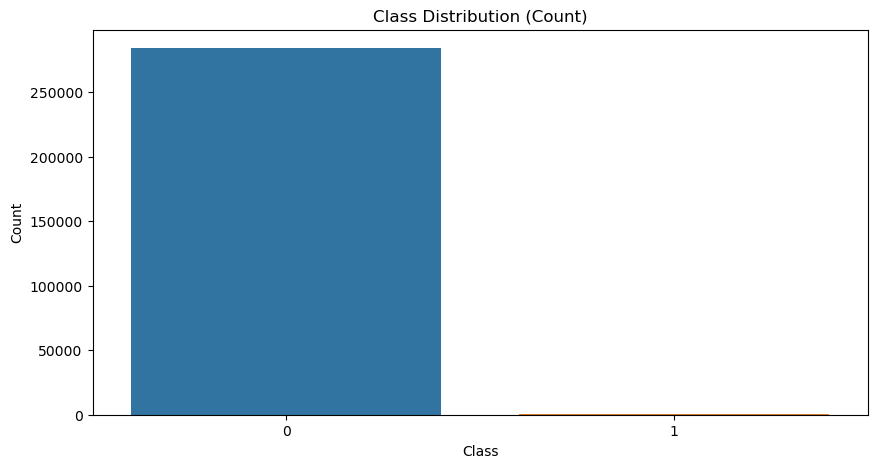

In [ ]:
#Creating Bar chart to show class distribution of our data in bar chart
plt.figure(figsize=(10, 5))
sns.countplot(data = creditcard_data, x='Class')
plt.title('Class Distribution (Count)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Get Fraud and Legitimate transactions separate
fraud = creditcard_data[creditcard_data.Class == 1]
legitimate = creditcard_data[creditcard_data.Class == 0]

In [ ]:
# Analyse how different are the amount used for fraud and legit transactions
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

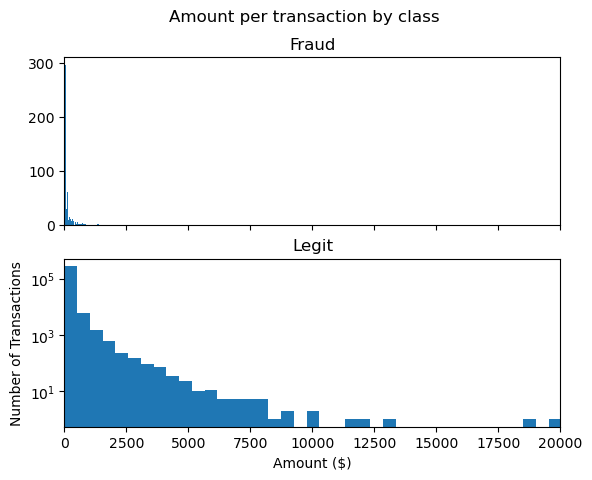

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legitimate.Amount, bins = bins)
ax2.set_title('Legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

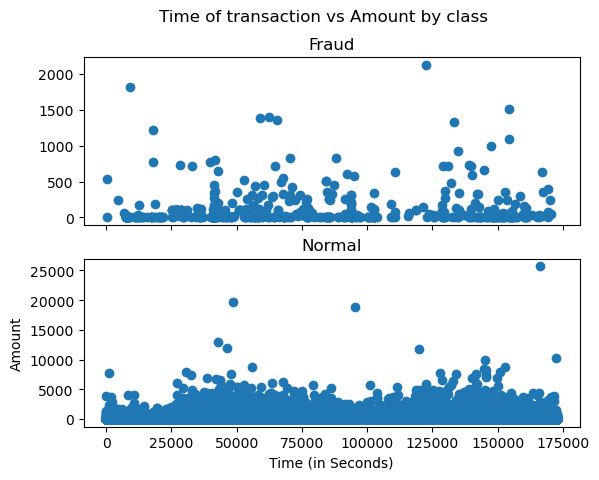

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legitimate.Time, legitimate.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

C:\Users\robyj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


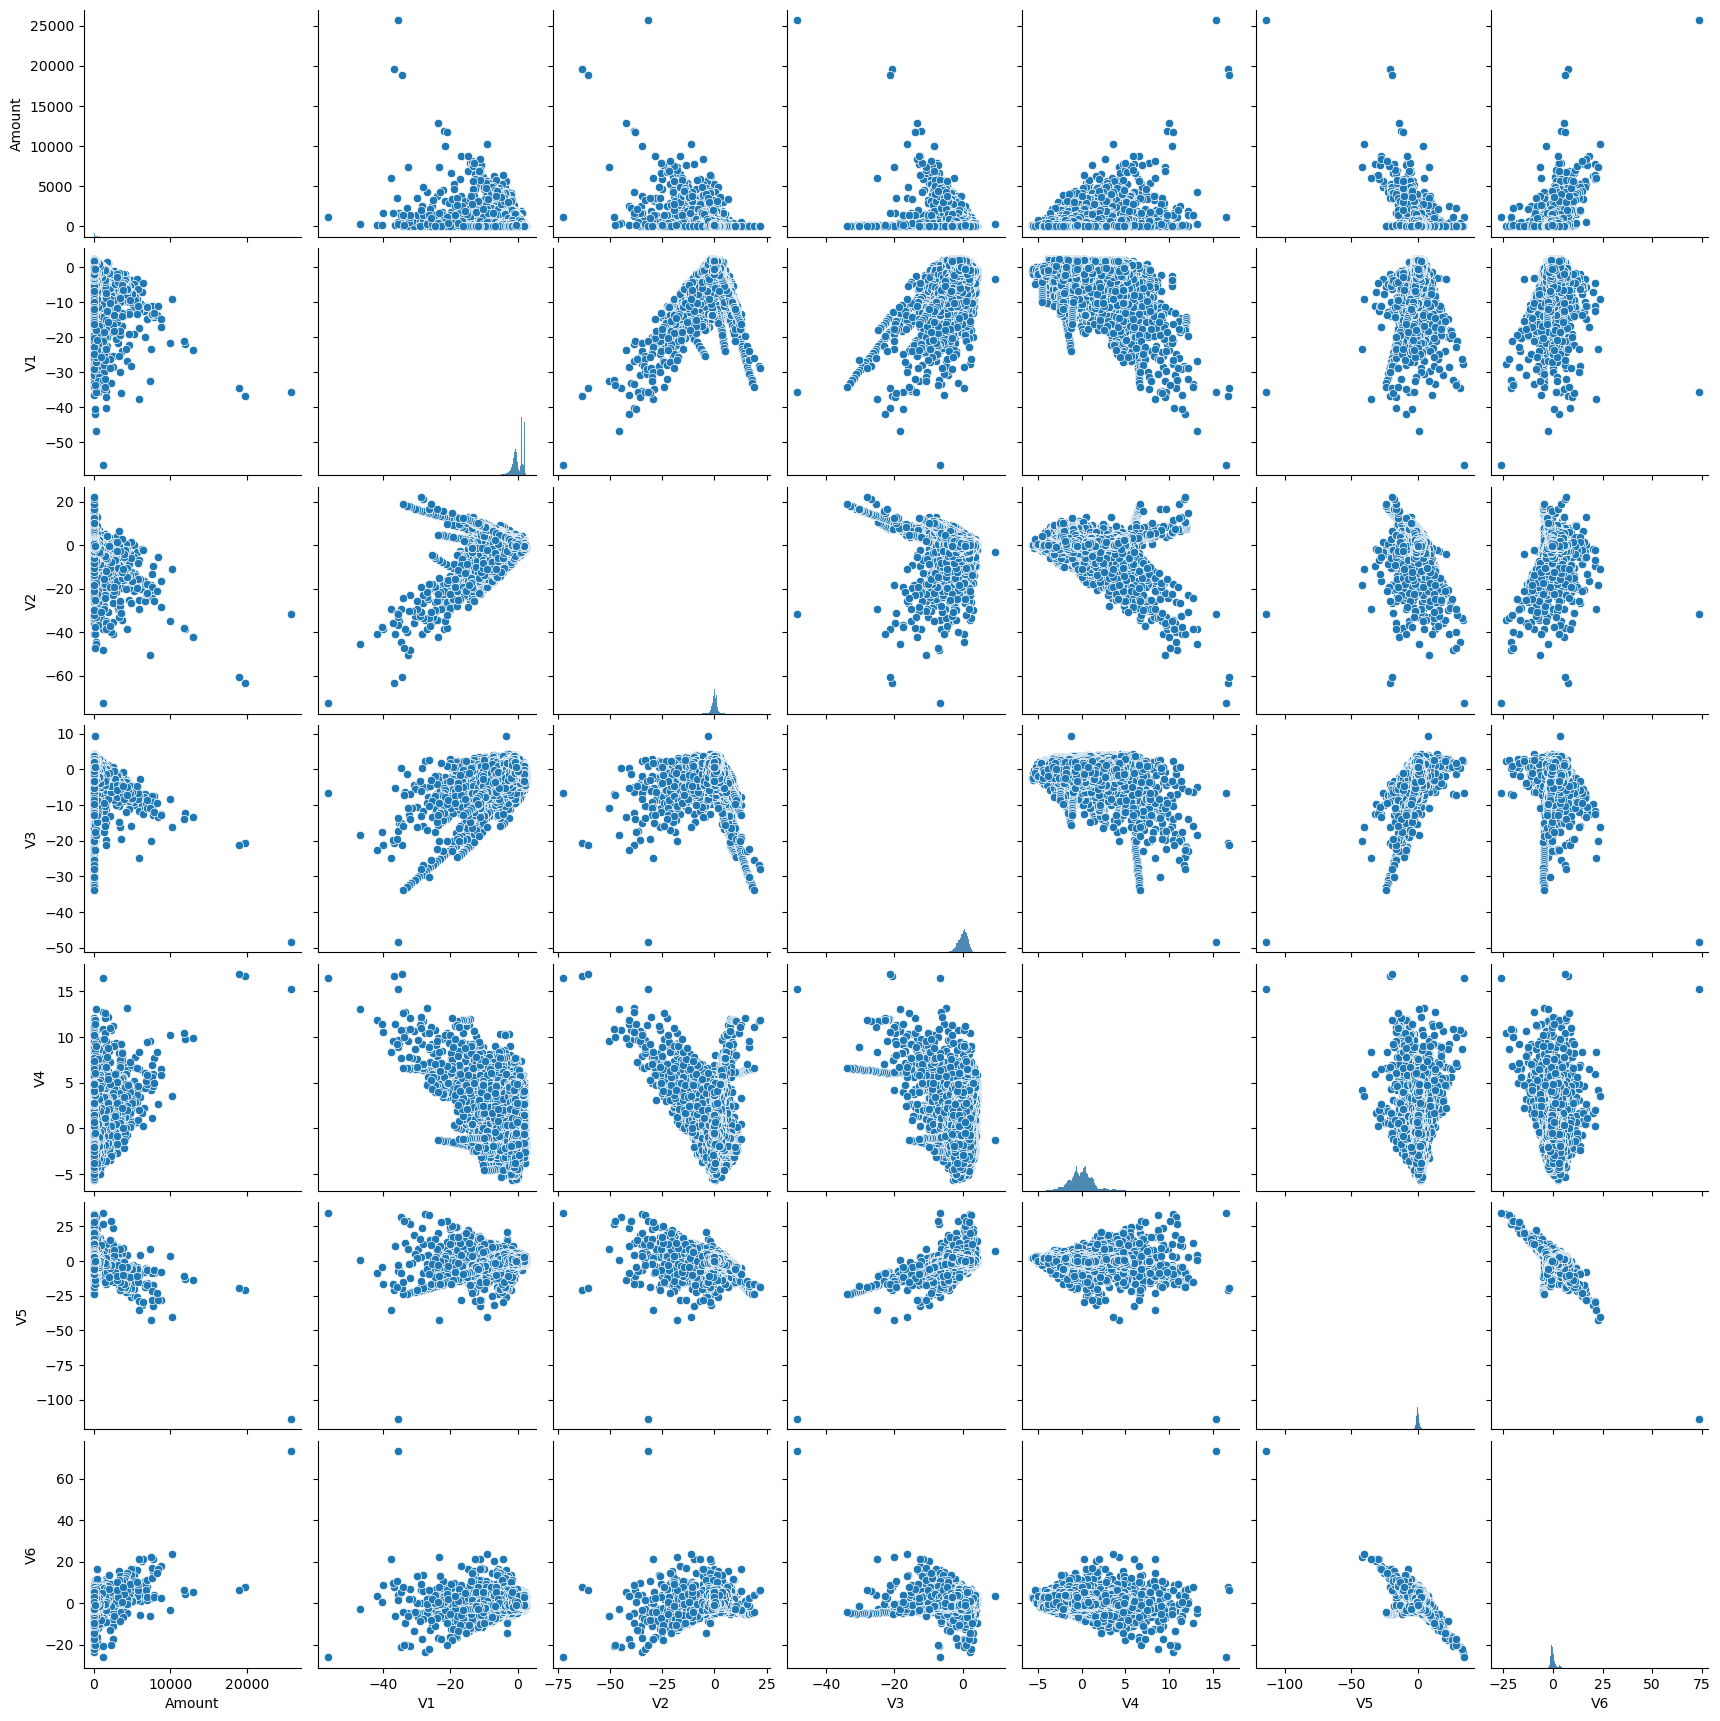

In [ ]:
# Plot the amount and a few other variables
sns.pairplot(data=creditcard_data,vars=["Amount","V1","V2","V3","V4","V5","V6"])
plt.show()

<Axes: >

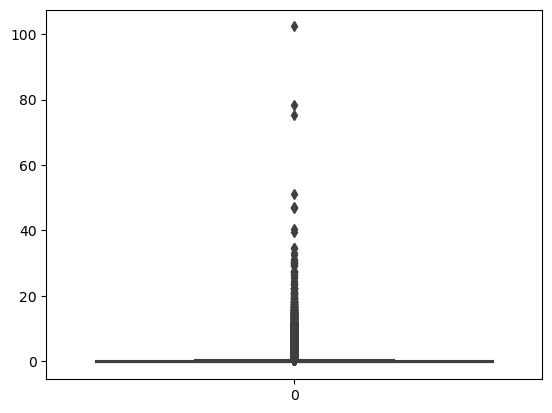

In [ ]:
# Scaling 'Amount' column and plotting boxplot to check for any ourliers
scaler = StandardScaler()
creditcard_data['Amount'] = scaler.fit_transform(creditcard_data[['Amount']])

sns.boxplot(creditcard_data['Amount'])

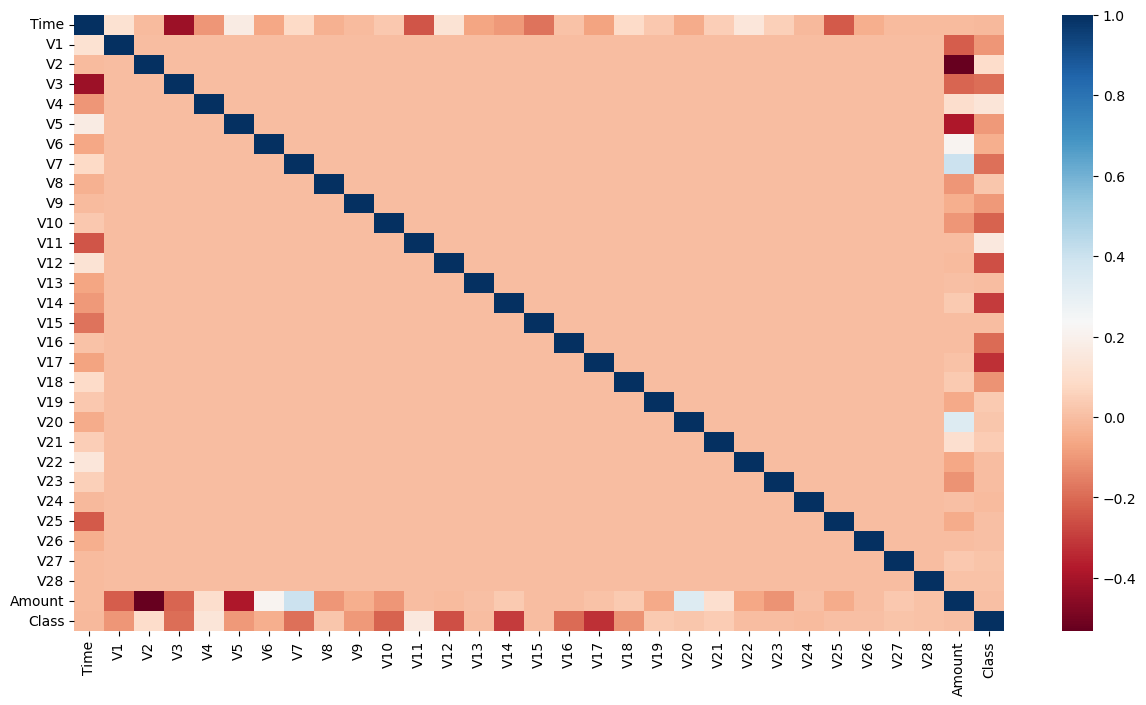

In [ ]:
# Correlation Matrix
corr = creditcard_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,cmap='RdBu')
plt.show()

**Machine learning and data prediction to identify a fraud transaction**

In [ ]:
# Get Fraud and Legitimate transactions separate
fraud = creditcard_data[creditcard_data.Class == 1]
legitimate = creditcard_data[creditcard_data.Class == 0]

In [ ]:
#Check the mean of amount and features for fraud and legitimate transactions
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,-0.000234
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


In [ ]:
# Class = 1 Fraud transactions
# Class = 0 legitimate transactions
creditcard_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# Highly unbalanced data for machine learning
# 492 fraud transactions and 284315 legitimate transactions
# Undersample legitimate transactions for a similar distribution

legitimate_sample = legitimate.sample(492)
legitimate_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
243910,152123.0,1.951582,-1.584189,-0.312092,-1.227692,-1.089109,1.006929,-1.601843,0.295051,0.264827,...,-0.133721,0.023447,0.152610,-0.278458,-0.685062,1.247107,-0.039723,-0.034282,0.074566,0
163786,116207.0,1.823485,-0.673950,-0.590649,0.119557,0.097215,1.511151,-0.943233,0.549470,1.266453,...,0.291049,1.133511,0.103015,-1.609638,-0.267349,-0.101990,0.083413,-0.061627,-0.261273,0
27459,34556.0,1.218100,0.166129,0.523770,0.509008,-0.464552,-0.678989,-0.074566,-0.030786,-0.141191,...,-0.211713,-0.671612,0.130093,0.310838,0.171362,0.078911,-0.035946,0.007698,-0.348072,0
93815,64596.0,1.108539,0.247769,1.044287,2.414754,-0.607787,-0.016459,-0.445858,0.241531,-0.440120,...,0.175196,0.358236,-0.053834,0.292676,0.343305,0.084936,-0.003799,0.016838,-0.310650,0
25990,33861.0,-0.683204,1.288491,0.646616,1.088671,0.348146,0.627266,0.309627,0.575769,-0.447541,...,-0.051391,0.097384,-0.204274,-0.941222,0.086262,-0.158019,0.301622,0.133030,-0.268630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163640,116112.0,1.877448,-0.730463,-1.425615,0.404262,0.175105,0.432826,-0.147491,0.099916,1.444592,...,-0.345601,-0.842082,-0.007264,-1.411156,0.094396,-0.442279,-0.011836,-0.060946,0.022271,0
264171,161301.0,-1.978758,-0.253236,2.875508,-1.775665,-1.390293,1.129398,-1.920492,-2.554977,0.745293,...,-1.059754,1.668995,-0.119278,0.057262,0.549941,-0.009688,-0.485476,-0.189694,-0.255676,0
20989,31397.0,-0.734116,1.400137,1.149041,0.230342,-0.535152,-1.317643,0.426698,0.293469,-0.666237,...,-0.175618,-0.568957,0.125305,0.875873,-0.189152,0.039623,0.120212,0.042372,-0.297296,0
234596,148039.0,-0.192622,0.709538,0.438933,1.047698,0.356008,0.004957,0.262693,0.212261,0.058503,...,-0.094155,-0.271492,0.207069,-0.608784,-1.499366,-0.982680,0.233421,0.288765,-0.175714,0


In [ ]:
# Get new data frame of 492 legitimate samples adn 492 fraud transactions
creditcard_dataset = pd.concat([legitimate_sample,fraud],axis=0)
creditcard_dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183191,1


In [ ]:
# Check the distribution of fraud and legitimate transactions in the new dataset
creditcard_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
# Check the mean of amount and features for fraud and legitimate transactions from the new dataset
# Compare with the mean from original dataset to confirm the sample is good
creditcard_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96741.186992,0.001693,-0.139313,-0.063762,-0.060340,0.156274,-0.053092,0.021934,0.015258,-0.013025,...,-0.000014,0.014390,-0.026374,0.014517,-0.031347,-0.004640,-0.007459,-0.014845,0.062606,0.002645
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


**Test and Train data**

In [ ]:
# Split the dataset into features and targets
X = creditcard_dataset.drop(columns='Class',axis=1)
Y = creditcard_dataset['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
243910  152123.0  1.951582 -1.584189 -0.312092 -1.227692 -1.089109  1.006929   
163786  116207.0  1.823485 -0.673950 -0.590649  0.119557  0.097215  1.511151   
27459    34556.0  1.218100  0.166129  0.523770  0.509008 -0.464552 -0.678989   
93815    64596.0  1.108539  0.247769  1.044287  2.414754 -0.607787 -0.016459   
25990    33861.0 -0.683204  1.288491  0.646616  1.088671  0.348146  0.627266   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
# Check data distribution of training and test data in X (80% training and 20% testing)
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


**Model Training**

**Supervised - Logistic regression**

In [ ]:
model = LogisticRegression()
#Train the model with training data
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
# Evaluate model using accuracy score
# Accuracy score on Training data
# Predict label of training data and store
X_train_prediction = model.predict(X_train)
# Get accuracy by comparing predicted value with actual value
accuracy_training  =accuracy_score(X_train_prediction,Y_train)
# Print accuracy score on training data
print("Accuracy score of training data is {:.4}".format(accuracy_training))

Accuracy score of training data is 0.9238


In [ ]:
# Accuracy score on Testing data
# Predict label of testing data and store
X_test_prediction = model.predict(X_test)
# Get accuracy by comparing predicted value with actual value
accuracy_testing  =accuracy_score(X_test_prediction,Y_test)
# Print accuracy score on testing data
print("Accuracy score of testing data is {:.4}".format(accuracy_testing))

Accuracy score of testing data is 0.9137


In [ ]:
# Confusion matrix and other performance measures
confusionMatrix = metrics.confusion_matrix(Y_test, X_test_prediction)
print(confusionMatrix)

[[96  3]
 [14 84]]


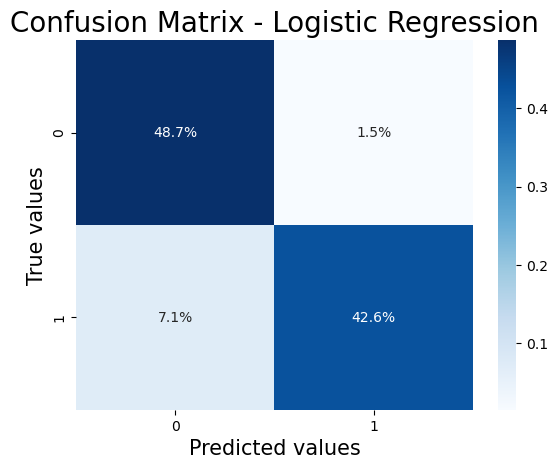

In [ ]:
# Print Confusion Matrix with seaborn - Logistic Regression
ax = sns.heatmap(confusionMatrix / np.sum(confusionMatrix), annot=True, fmt='.1%', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted values', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True values', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [ ]:
# Find the Mean Absolute Error, Mean Squared Error and r Squared
mean_abs_error = mean_absolute_error(Y_test,X_test_prediction)
mse= mean_squared_error(Y_test,X_test_prediction)
r_squared_error = r2_score(Y_test,X_test_prediction)
print("Mean absolute error : {} \nMean Squared Error : {}\nR Squared Error  {}".format(mean_abs_error,mse,r_squared_error))

Mean absolute error : 0.08629441624365482 
Mean Squared Error : 0.08629441624365482
R Squared Error  0.6548134405277264


In [ ]:
# Print Classification Report - Logistic Regression
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        99
           1       0.97      0.86      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



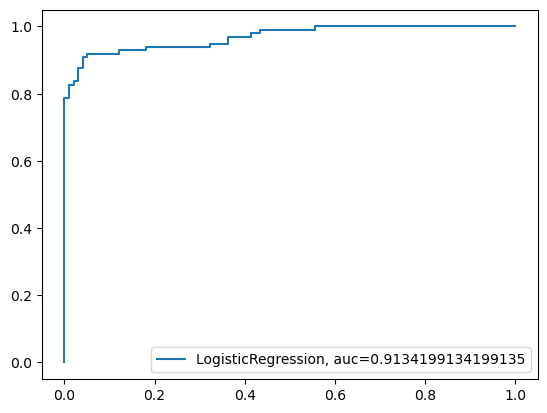

In [ ]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_probability)
auc = metrics.roc_auc_score(Y_test, X_test_prediction)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Unsupervised - K Means Clustering**

In [ ]:
# Choose 3 clusters
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(X_train)
print(kmeans.get_params())

C:\Users\robyj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 'warn', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [ ]:
# Silhouette score & Calinski_harabasz Coefficient
print("Silhouette Coefficient:", metrics.silhouette_score(X_train, kmeans.labels_))
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(X_train, kmeans.labels_))

Silhouette Coefficient: 0.5608340880373649
Calinski_harabasz Coefficient: 4951.580972712178


In [ ]:
# Completeness & Homogeneity score
print("Completeness score", metrics.completeness_score(Y_train, kmeans.labels_))
print("Homogeneity score", metrics.homogeneity_score(Y_train, kmeans.labels_))

Completeness score 0.020575969833945124
Homogeneity score 0.0475237240942545


C:\Users\robyj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 640x480 with 0 Axes>

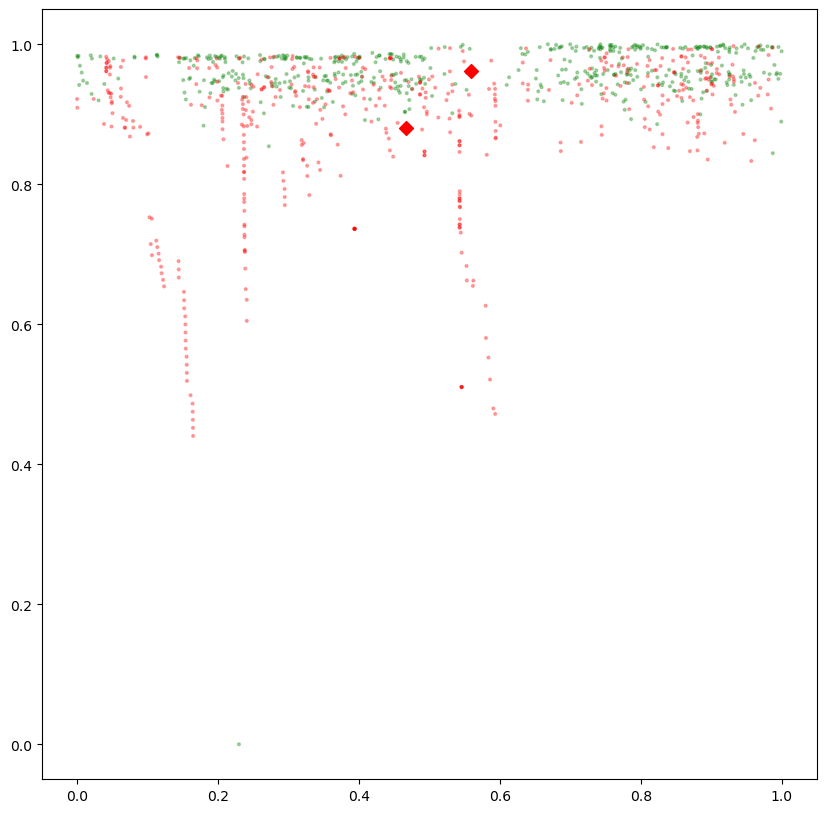

In [ ]:
X_km=np.array(creditcard_dataset).astype(float)
scaler =MinMaxScaler()
X_scaled=scaler.fit_transform(X_km)
model=KMeans(n_clusters=2, random_state=42).fit(X_scaled)

xs = X_scaled[:,0]
ys = X_scaled[:,1]

#labels=creditcard['fraud']
colors=['red' if x==1 else 'green' for x in creditcard_dataset['Class']]


plt.clf()
plt.figure(figsize=(10,10))
# Make a scatter plot of xs and ys, using labels to define the colors
_=plt.scatter(xs,ys,c=colors, alpha=0.3,s=4)

#ggplot(creditcard, aes(x=xs, y=ys)) + geom_point(color='darkblue')

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
_=plt.scatter(centroids_x,centroids_y, marker='D',s=50,c='red')
plt.show()